In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [ ]:
#Thanks for the second chance on doing this. I went from getting only half the graphs to getting them all. I am not sure if it was the extra time or not stressing about other tests, but it was much easier for me to find and fix my errors this time around.

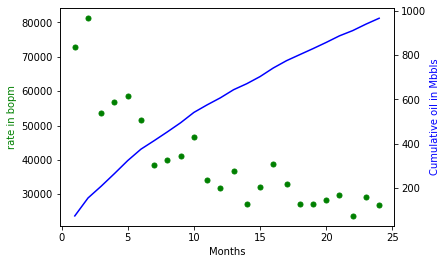

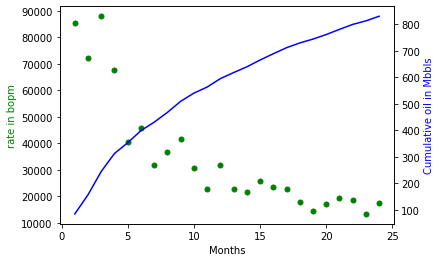

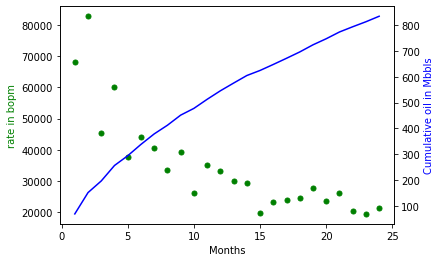

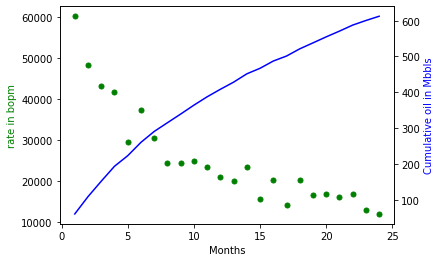

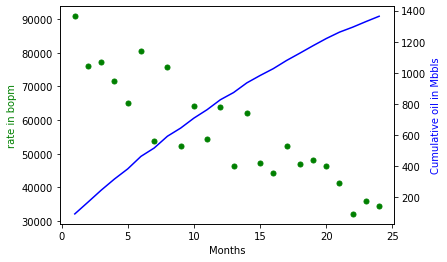

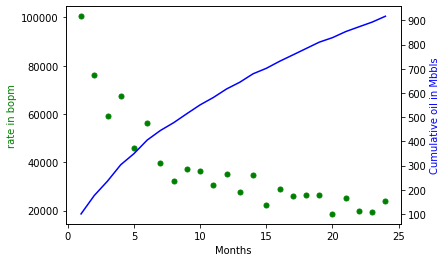

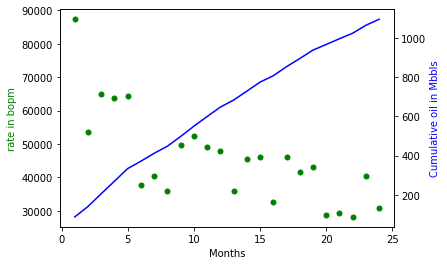

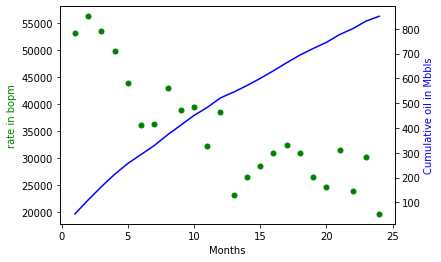

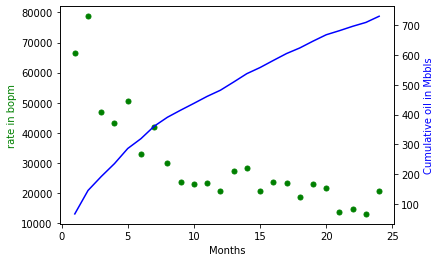

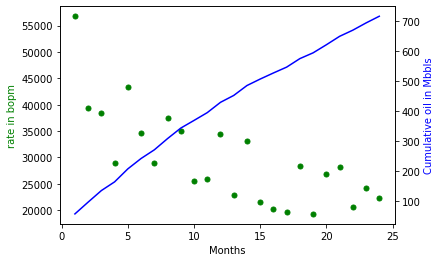

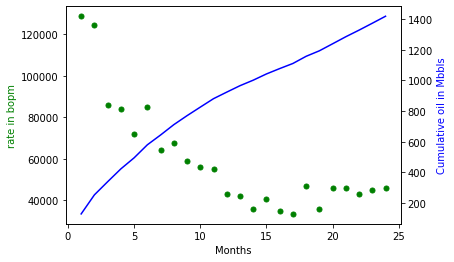

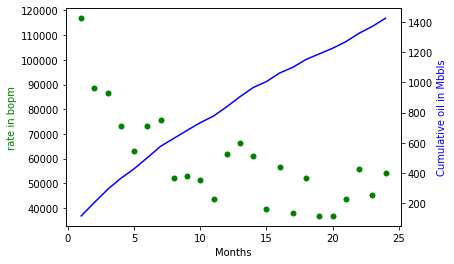

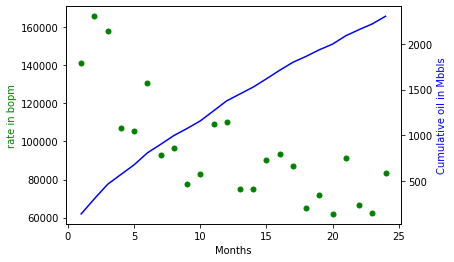

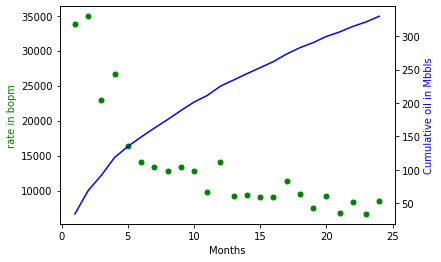

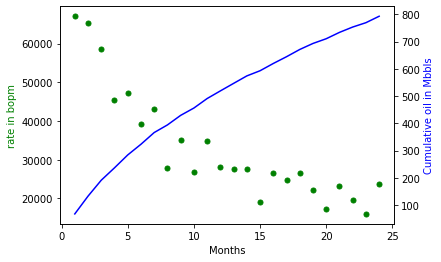

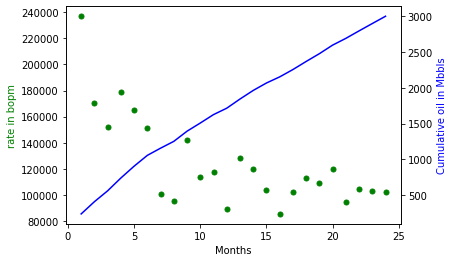

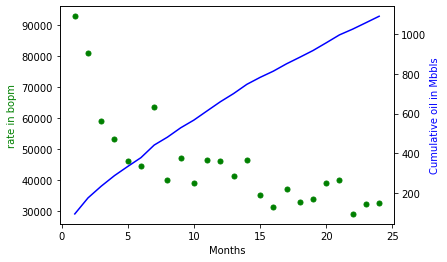

In [17]:
#1
#i tried to use ax1/2 to make primary and secondary plots but i could not figure it out.
#Attempt number two I figured it out. It was a syntax error where I had df1 instead of prodDF.
conn  = sqlite3.connect("DCA.db")
cur = conn.cursor()
titlefontsize=18
axisLabelFontSize=15
axisNumFontSize=13
dfLength=24
gasWellID = np.random.randint(1,17,5)
for wellID in range(1,18):
    prodDF=pd.read_sql_query(f"SELECT time,rate, Cum,Cum_model FROM Rates WHERE wellID={wellID};", conn)
    dcaDF = pd.read_sql_query("SELECT * FROM DCAparams;", conn)
    fig,ax1=plt.subplots()
    ax2=ax1.twinx()
    ax1.plot(prodDF['time'],prodDF['rate'], color="green", ls='None', marker='o', markersize=5,)
    ax2.plot(prodDF['time'],prodDF['Cum']/1000,'b-')
    ax1.set_xlabel('Months')
    ax1.set_ylabel('rate in bopm',color='g')
    ax2.set_ylabel('Cumulative oil in Mbbls',color='b')
    plt.show()

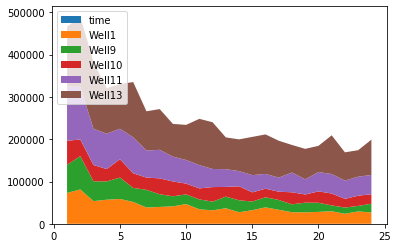

In [32]:
#2 
#I have no clue how to get rid of time on my graph.
for wellID in range(1,18):
    prodDF=pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};",conn)
    dcaDF=pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid='gas';",conn)
for n in dcaDF['wellID']:
    prodDF['Well'+str(n)]=pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID={n};",conn)    
cumgas=prodDF
labels = prodDF.columns
fig, ax = plt.subplots()
ax.stackplot(prodDF['time'], np.transpose(cumgas), labels=labels)
ax.legend(loc='upper left')

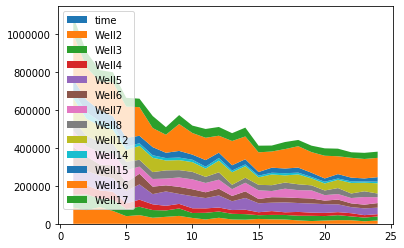

In [34]:
#3
for wellID in range(1,18):
    prodDF=pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};",conn)
    dcaDF=pd.read_sql_query(f"SELECT wellID FROM DCAparams WHERE fluid='oil';",conn)
for n in dcaDF['wellID']:
    prodDF['Well'+str(n)]=pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID={n};",conn)    
cumoil=prodDF
labels = prodDF.columns
fig, ax = plt.subplots()
ax.stackplot(prodDF['time'], np.transpose(cumoil), labels=labels)
ax.legend(loc='upper left')

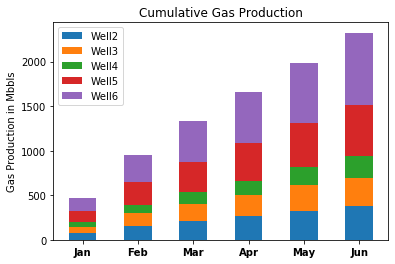

In [86]:
#4
m=1
conn  = sqlite3.connect("DCA.db")
cur = conn.cursor()
N = 6
ind = np.arange(1,N+1) 
months = ['Jan','Feb','Mar','Apr','May','Jun']
result = np.zeros(len(months))
width = 0.5
for wellID in range(1,18):
    prodDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)    
    dcaDF = pd.read_sql_query("SELECT wellID FROM DCAparams WHERE fluid='gas';", conn)     
for n in dcaDF['wellID']:   
    prodDF['Well' + str(n)] = pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID={n};", conn)
for n in dcaDF['wellID']:
    p1 = plt.bar(prodDF['time'][0:N], prodDF['Well' + str(n)][0:N]/1000,width, bottom = result)
    labels.append('Well' + str(n))
    plt.ylabel('Gas Production in Mbbls')
    plt.title('Cumulative Gas Production')
    plt.xticks(ind, months, fontweight='bold')
    m+=1
    split = prodDF.iloc[0:6,1:m].to_numpy()  
    result = np.sum(a=split,axis=1)/1000
    plt.legend(labels)   

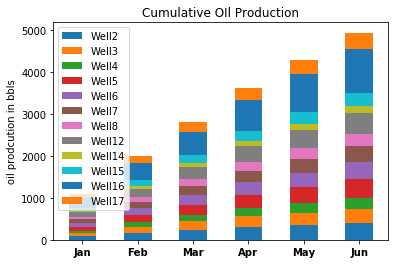

In [83]:
#5
m=1
conn  = sqlite3.connect("DCA.db")
cur = conn.cursor()
N = 6
ind = np.arange(1,N+1) 
months = ['Jan','Feb','Mar','Apr','May','Jun']
result = np.zeros(len(months))
width = 0.5
for wellID in range(1,18):
    prodDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)    
    dcaDF = pd.read_sql_query("SELECT wellID FROM DCAparams WHERE fluid='oil';", conn)     
for n in dcaDF['wellID']:   
    prodDF['Well' + str(n)] = pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID={n};", conn)
for n in dcaDF['wellID']:
    p1 = plt.bar(prodDF['time'][0:N], prodDF['Well' + str(n)][0:N]/1000,width, bottom = result)
    labels.append('Well' + str(n))
    plt.ylabel('oil prodcution in bbls')
    plt.title('Cumulative OIl Production')
    plt.xticks(ind, months, fontweight='bold')
    m+=1
    split = prodDF.iloc[0:6,1:m].to_numpy()  
    result = np.sum(a=split,axis=1)/1000
    plt.legend(labels)   

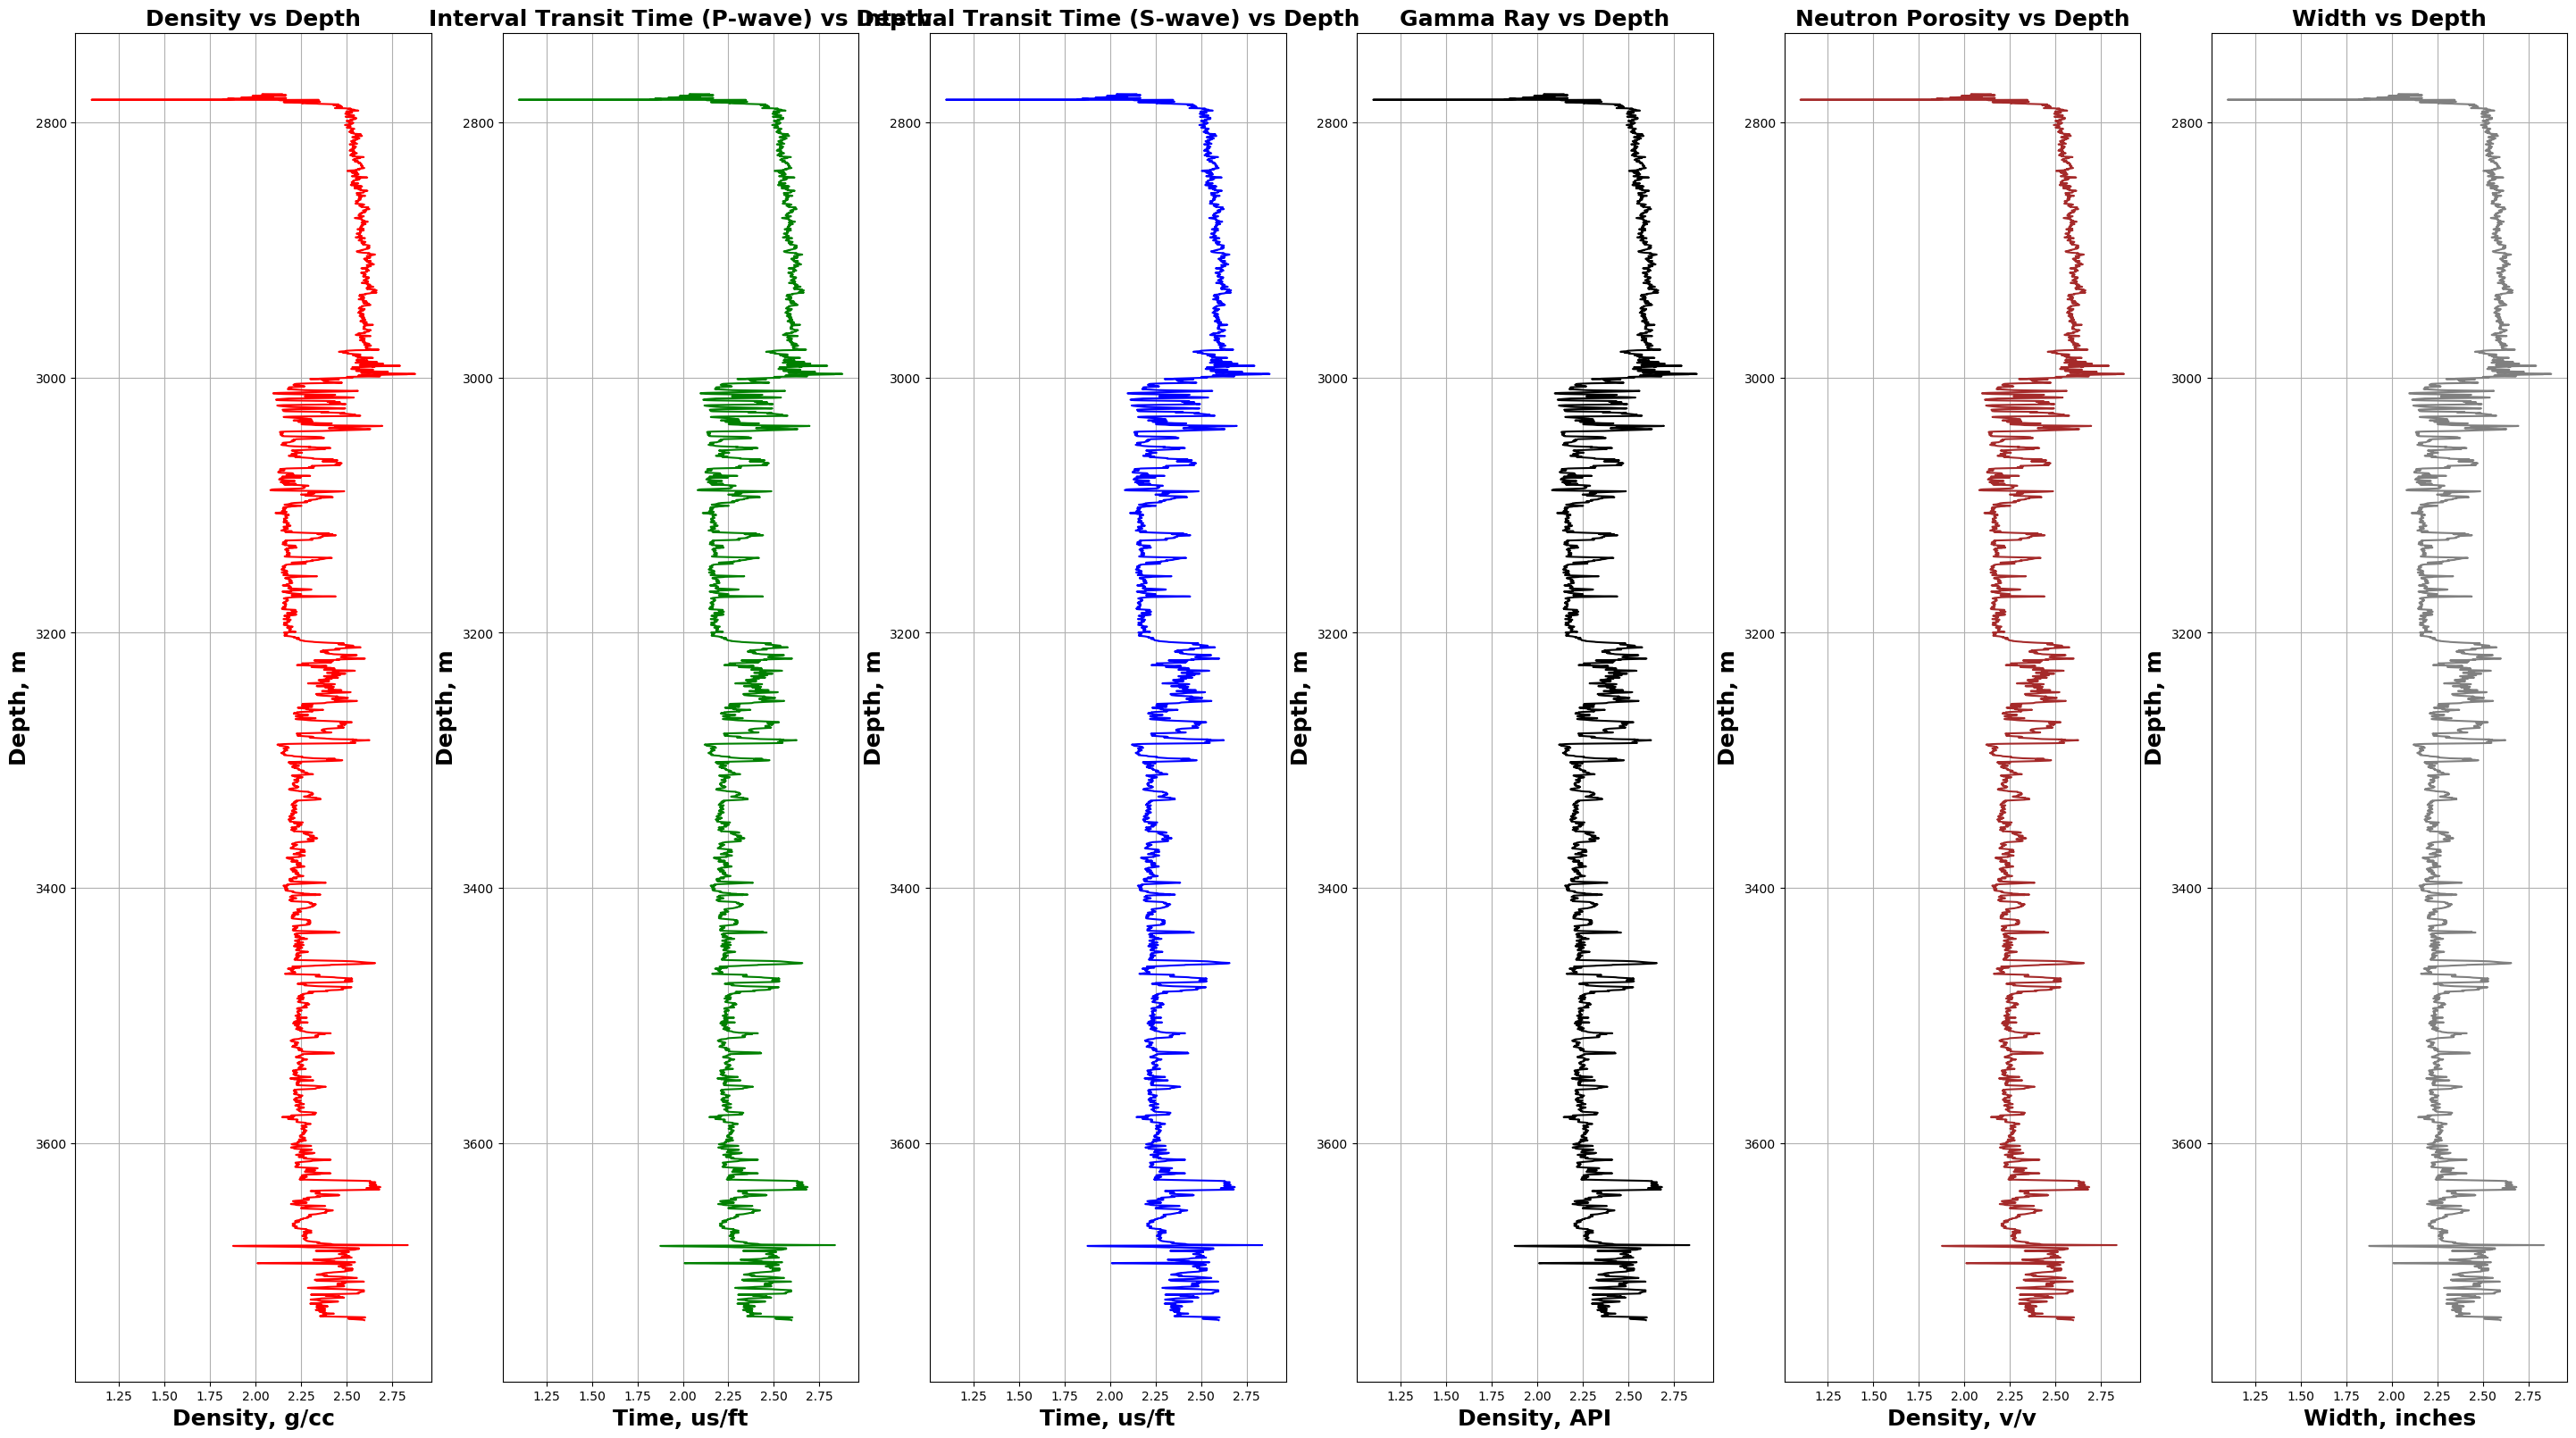

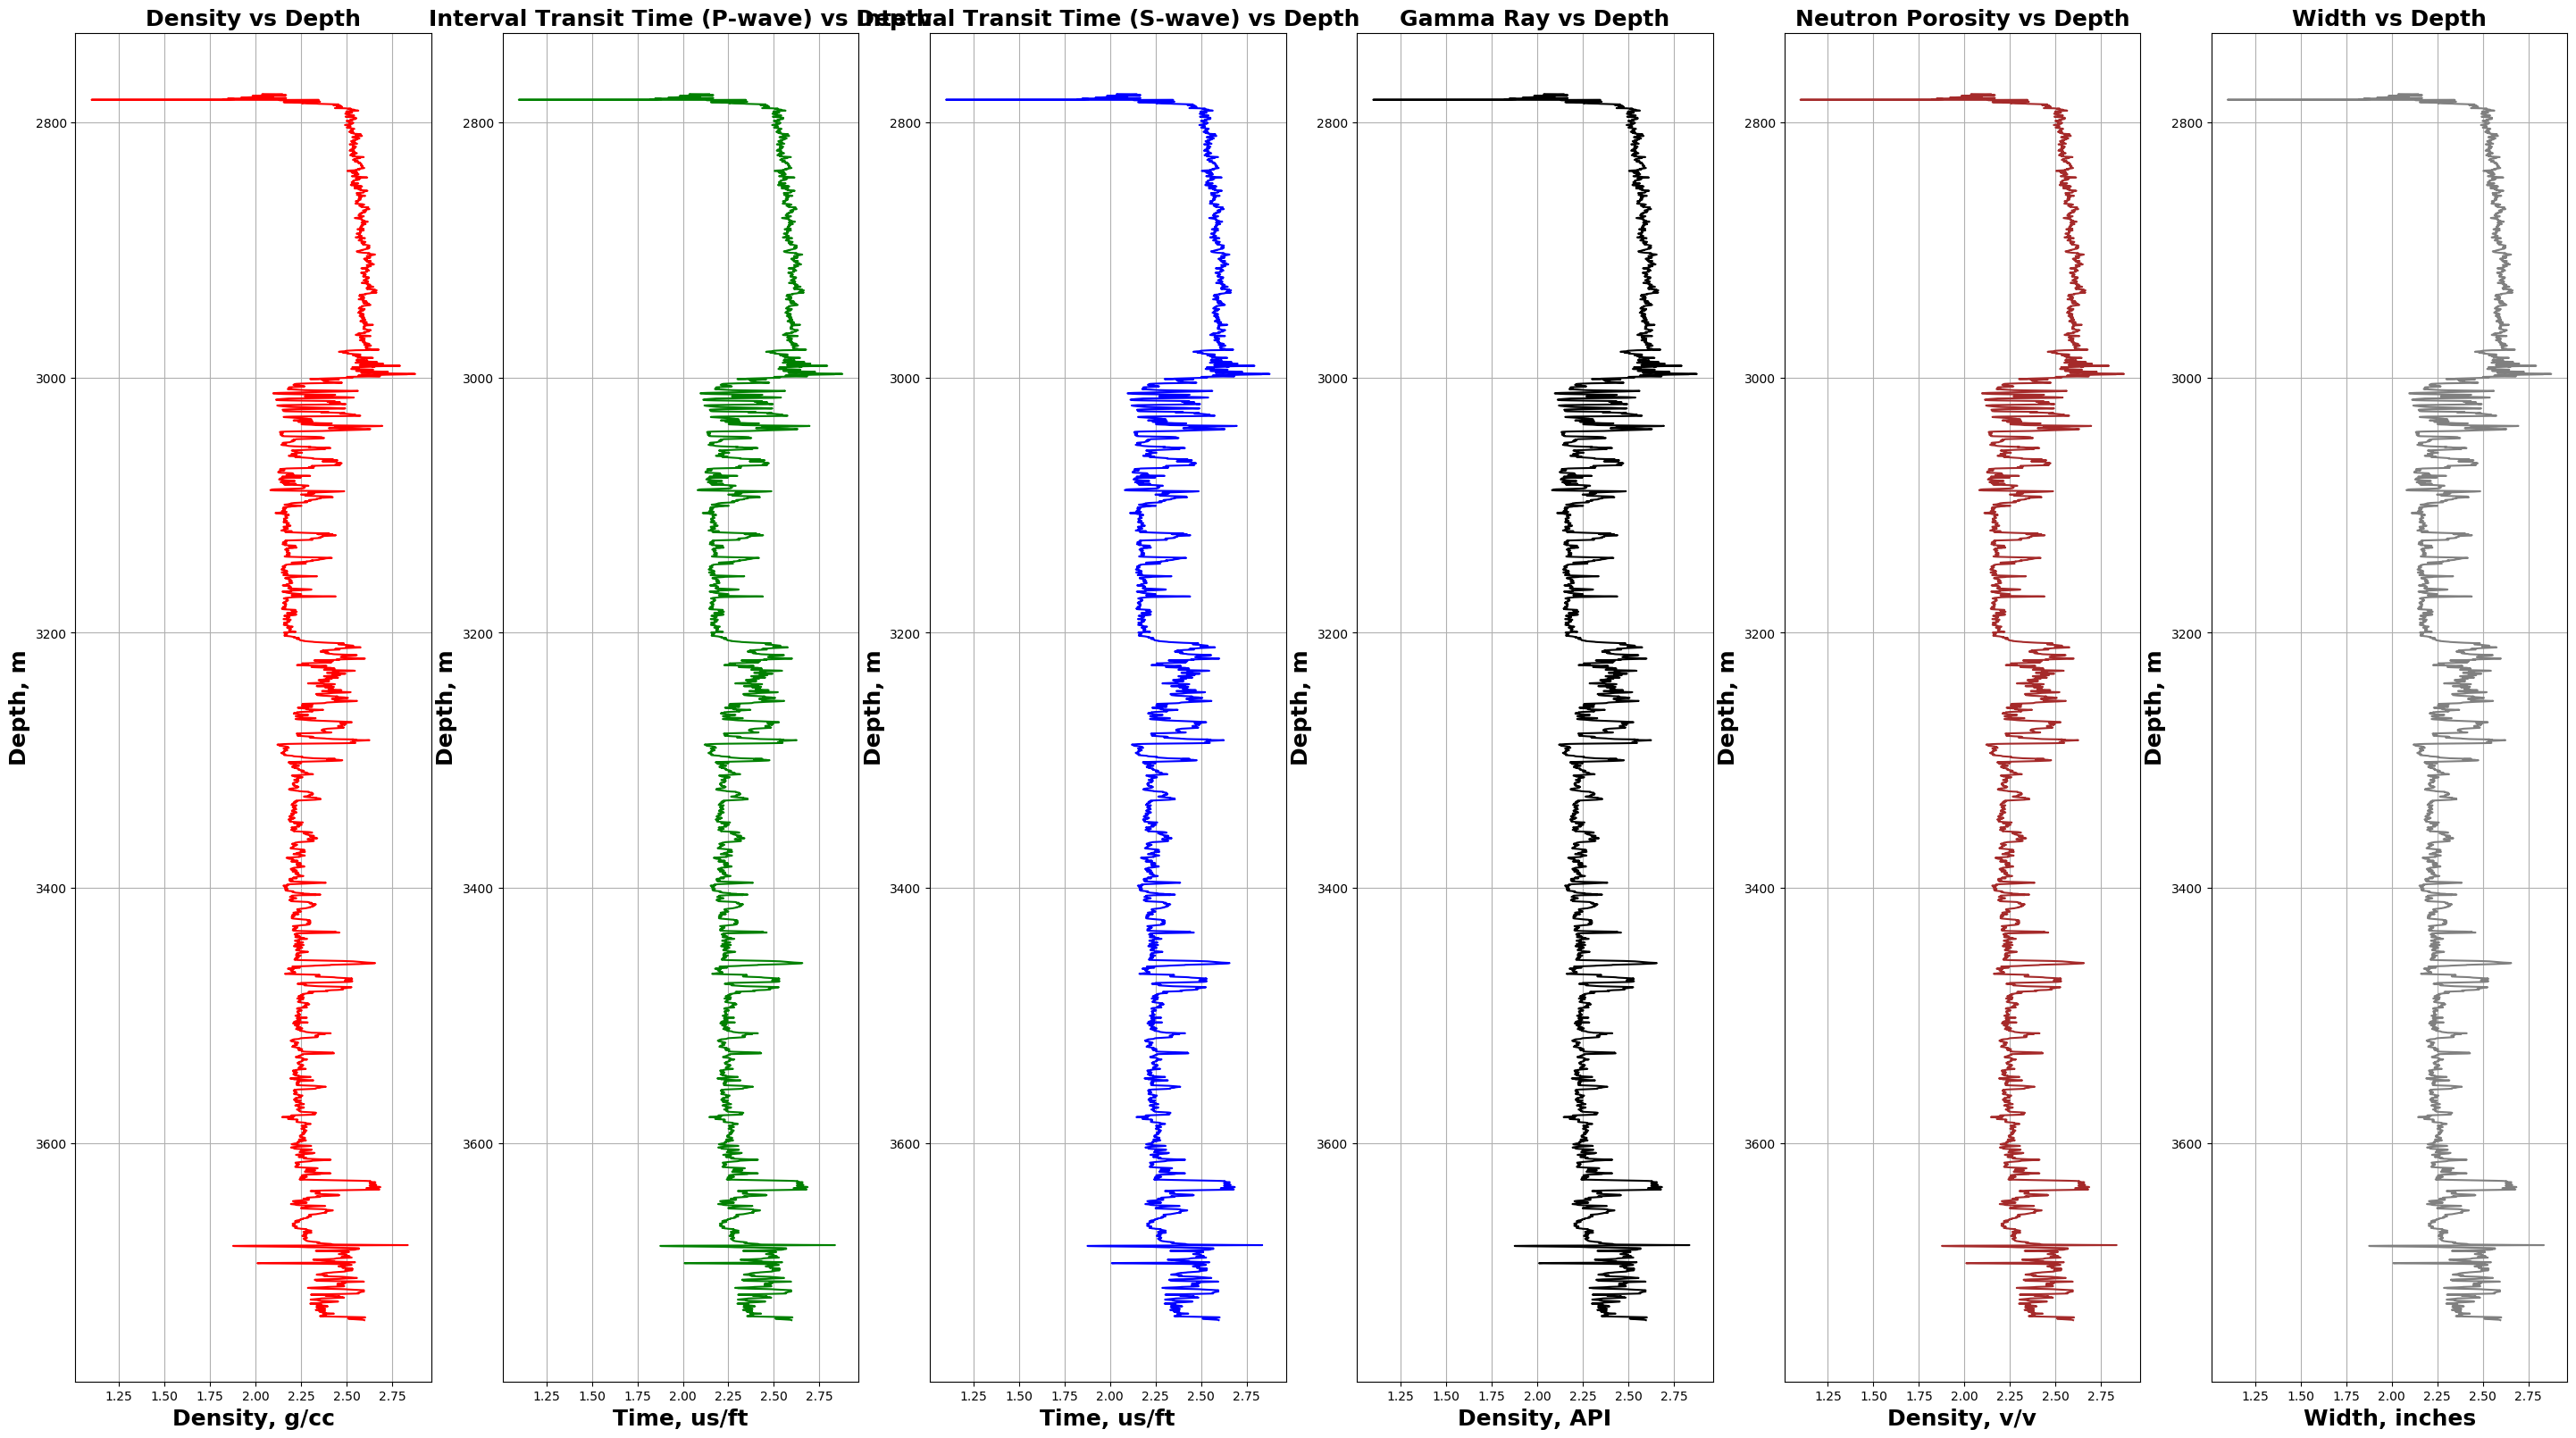

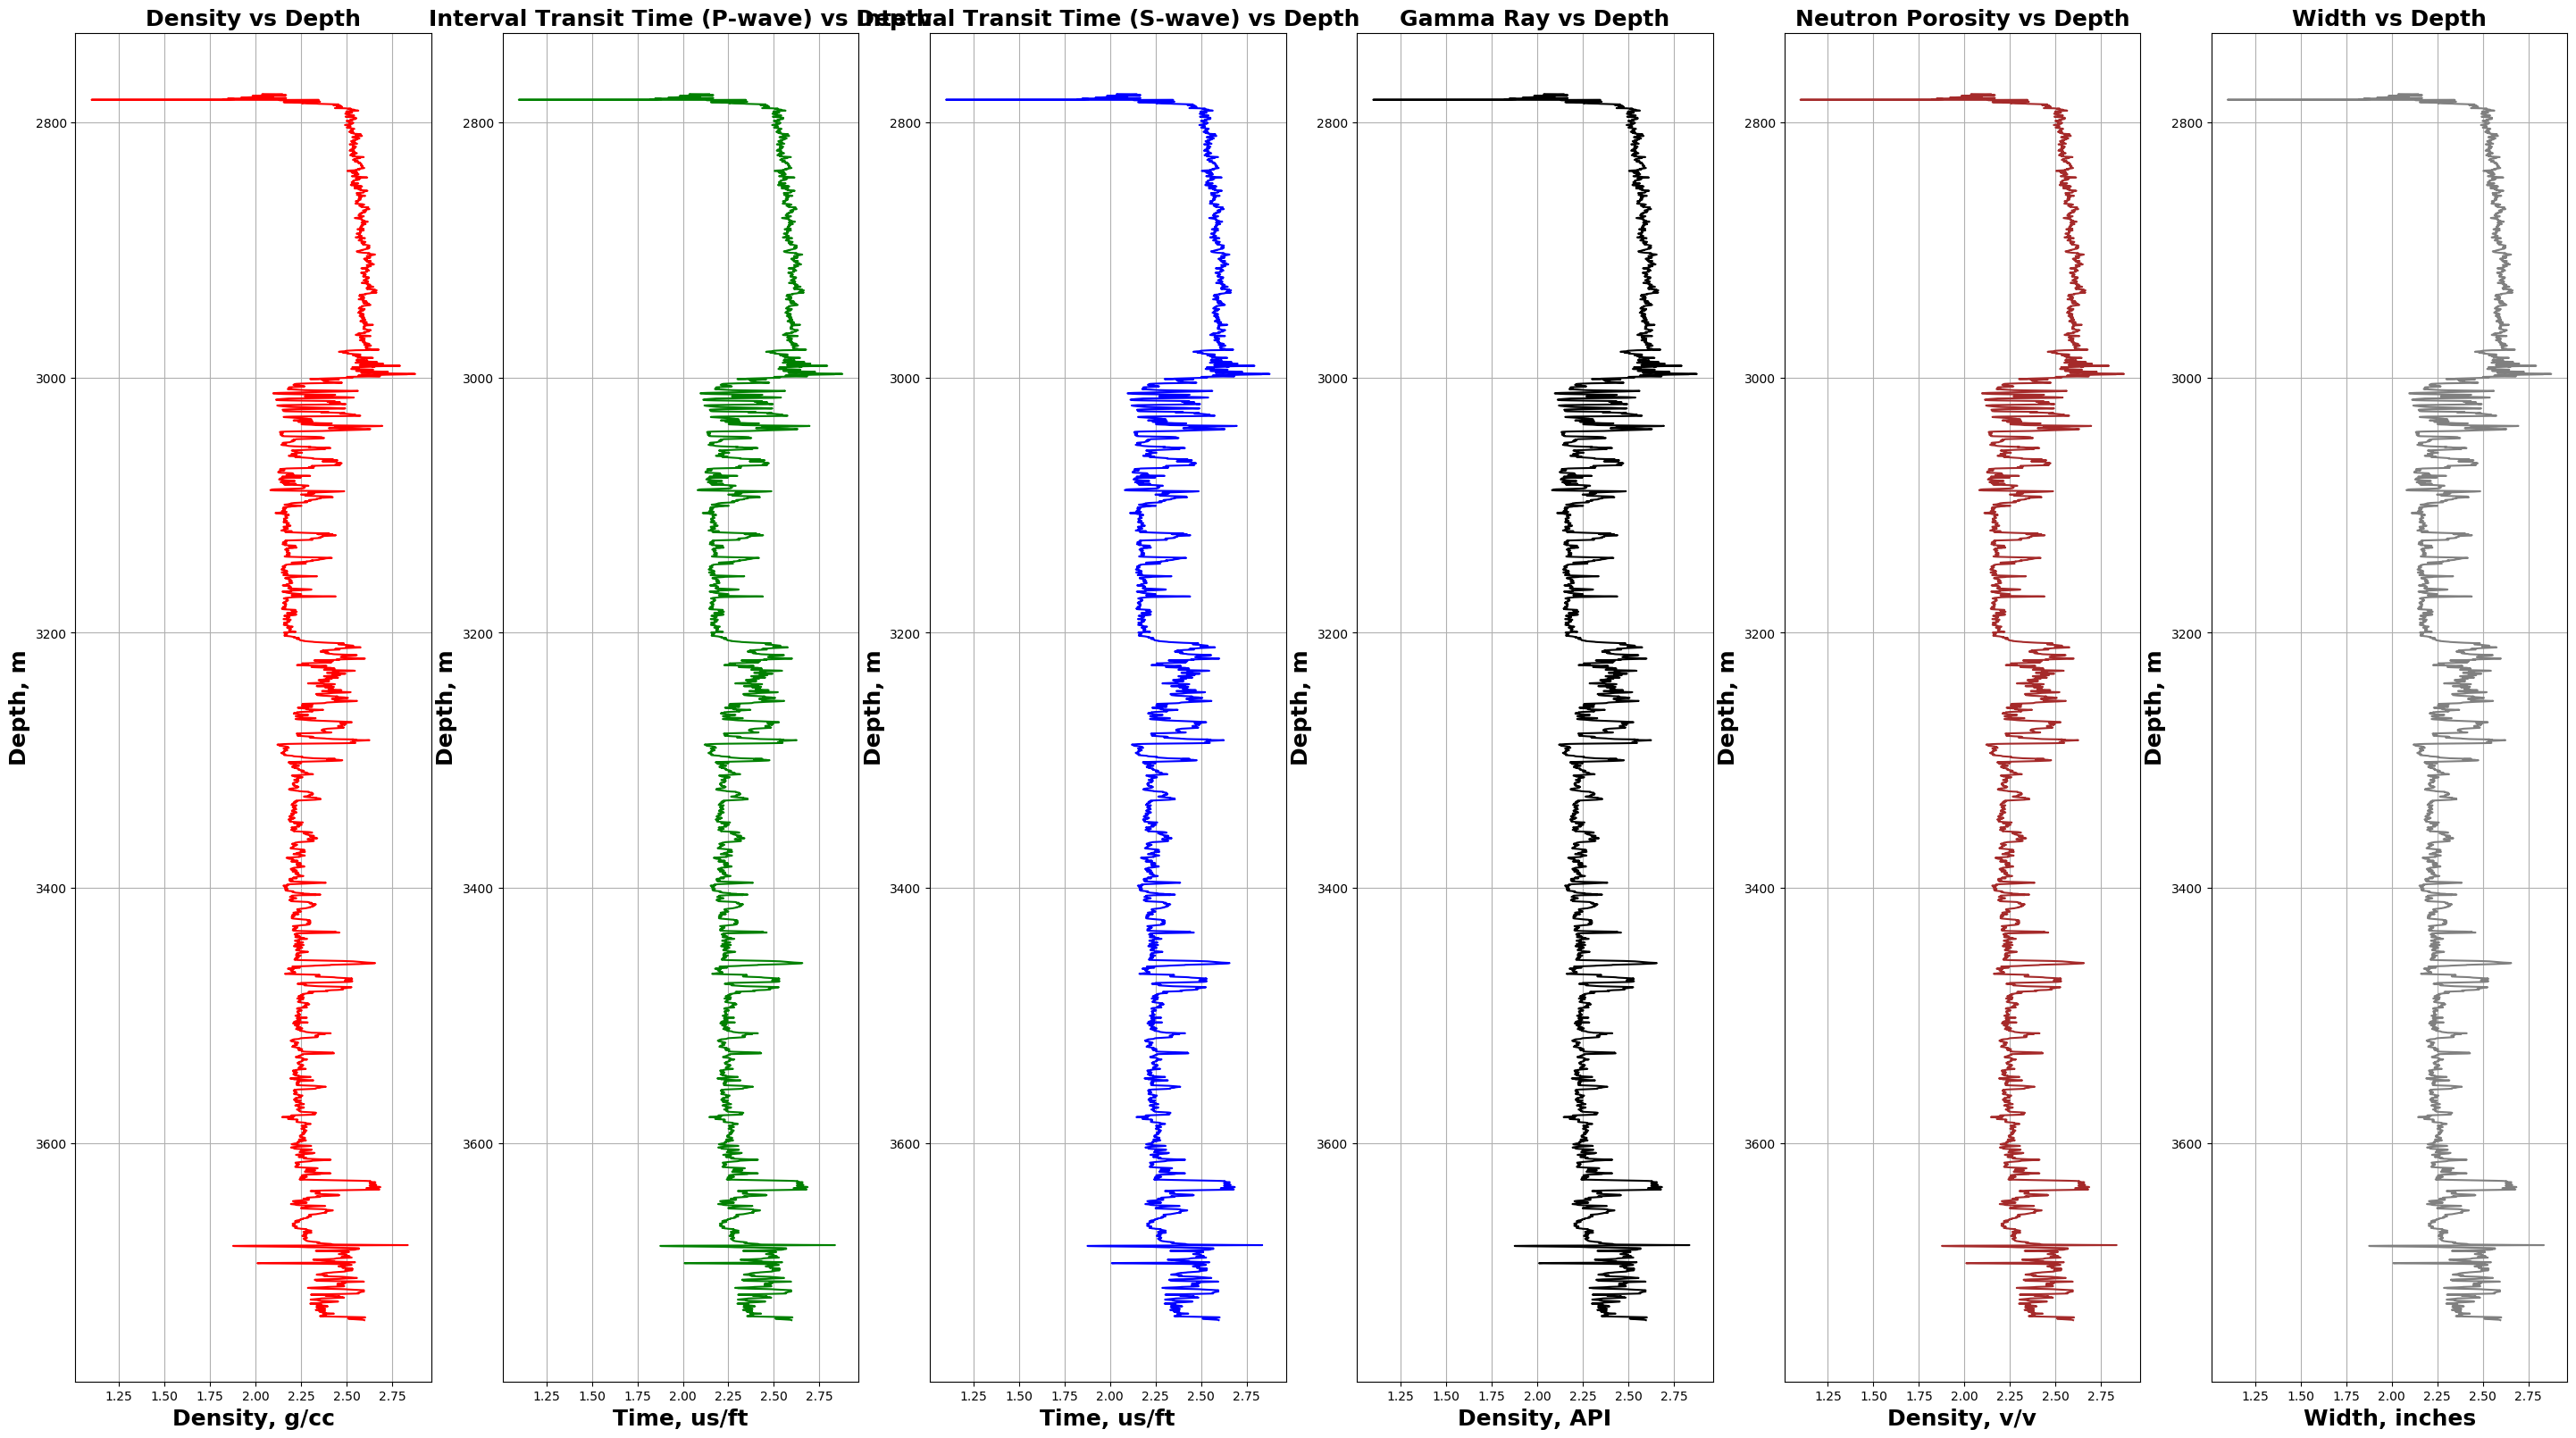

In [13]:
#6
#error states log not found and i dont know how to fix
#second time around I got it right. I had seveal syntax errors but the main issue was folder location
conn  = sqlite3.connect("DCA.db")
cur = conn.cursor()




data1 = np.loadtxt("volve_logs/15_9-F-1B_INPUT.LAS", skiprows=69)
data1DF = pd.read_csv("volve_logs/15_9-F-1B_INPUT.LAS",skiprows=69, sep = '\s+' )

#Load and prepare the data
data = np.loadtxt("WLC_PETRO_COMPUTED_INPUT_1.DLIS.0.las", skiprows=48)
DZ,rho=data[:,0], data[:,1]

#clean data where negative density
DZ=DZ[np.where(rho>0)]
rho=rho[np.where(rho>0)]

fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 6, 1)
plt.grid(axis='both')
plt.plot(rho,DZ, color='red')
plt.title('Density vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 2)
plt.grid(axis='both')
plt.plot(rho,DZ, color='green')
plt.title('Interval Transit Time (P-wave) vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Time, us/ft', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 3)
plt.grid(axis='both')
plt.plot(rho,DZ, color='blue')
plt.title('Interval Transit Time (S-wave) vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Time, us/ft', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 4)
plt.grid(axis='both')
plt.plot(rho,DZ, color='black')
plt.title('Gamma Ray vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, API', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 5)
plt.grid(axis='both')
plt.plot(rho,DZ, color='brown')
plt.title('Neutron Porosity vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, v/v', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 6)
plt.grid(axis='both')
plt.plot(rho,DZ, color='grey')
plt.title('Width vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Width, inches', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

fig.savefig('well_1_log.png', dpi=600)


   
    
    
    
data1 = np.loadtxt("volve_logs/15_9-F-4_INPUT.LAS", skiprows=69)
data1DF = pd.read_csv("volve_logs/15_9-F-4_INPUT.LAS",skiprows=69, sep = '\s+' )

#Load and prepare the data
data = np.loadtxt("WLC_PETRO_COMPUTED_INPUT_1.DLIS.0.las", skiprows=48)
DZ,rho=data[:,0], data[:,1]

#clean data where negative density
DZ=DZ[np.where(rho>0)]
rho=rho[np.where(rho>0)]

fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 6, 1)
plt.grid(axis='both')
plt.plot(rho,DZ, color='red')
plt.title('Density vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 2)
plt.grid(axis='both')
plt.plot(rho,DZ, color='green')
plt.title('Interval Transit Time (P-wave) vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Time, us/ft', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 3)
plt.grid(axis='both')
plt.plot(rho,DZ, color='blue')
plt.title('Interval Transit Time (S-wave) vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Time, us/ft', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 4)
plt.grid(axis='both')
plt.plot(rho,DZ, color='black')
plt.title('Gamma Ray vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, API', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 5)
plt.grid(axis='both')
plt.plot(rho,DZ, color='brown')
plt.title('Neutron Porosity vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, v/v', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 6)
plt.grid(axis='both')
plt.plot(rho,DZ, color='grey')
plt.title('Width vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Width, inches', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

fig.savefig('well_1_log.png', dpi=600)







data1 = np.loadtxt("volve_logs/15_9-F-14_INPUT.LAS", skiprows=69)
data1DF = pd.read_csv("volve_logs/15_9-F-14_INPUT.LAS",skiprows=69, sep = '\s+' )

#Load and prepare the data
data = np.loadtxt("WLC_PETRO_COMPUTED_INPUT_1.DLIS.0.las", skiprows=48)
DZ,rho=data[:,0], data[:,1]

#clean data where negative density
DZ=DZ[np.where(rho>0)]
rho=rho[np.where(rho>0)]

fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 6, 1)
plt.grid(axis='both')
plt.plot(rho,DZ, color='red')
plt.title('Density vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 2)
plt.grid(axis='both')
plt.plot(rho,DZ, color='green')
plt.title('Interval Transit Time (P-wave) vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Time, us/ft', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 3)
plt.grid(axis='both')
plt.plot(rho,DZ, color='blue')
plt.title('Interval Transit Time (S-wave) vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Time, us/ft', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 4)
plt.grid(axis='both')
plt.plot(rho,DZ, color='black')
plt.title('Gamma Ray vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, API', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 5)
plt.grid(axis='both')
plt.plot(rho,DZ, color='brown')
plt.title('Neutron Porosity vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Density, v/v', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

plt.subplot(1, 6, 6)
plt.grid(axis='both')
plt.plot(rho,DZ, color='grey')
plt.title('Width vs Depth', fontsize=18, fontweight='bold')
plt.xlabel('Width, inches', fontsize = 18, fontweight='bold')
plt.ylabel('Depth, m', fontsize = 18, fontweight='bold')
plt.gca().invert_yaxis()

fig.savefig('well_1_log.png', dpi=600)